# Regressão Linear com rede neural em PyTorch

Este código treina uma rede neural simples para aprender a relação entre os dados de entrada x_input e os dados de saída y_input. O objetivo é minimizar a perda, ou seja, a diferença entre as previsões da rede e os valores reais. A visualização da perda ajuda a entender como o modelo está aprendendo ao longo do tempo.

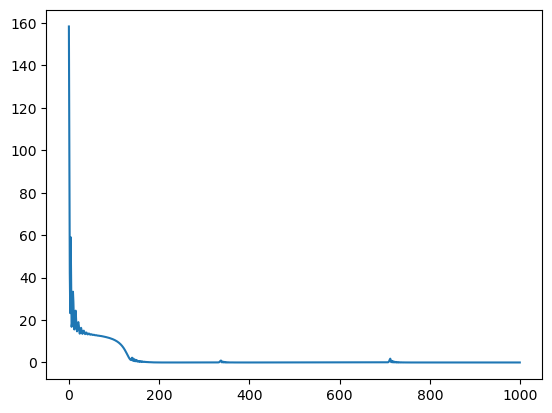

In [1]:
## 1. Importar bibliotecas:
import torch
import matplotlib.pyplot as plt

## 2. Gerar os dados de entrada com a definição de tensores com valores de entrada (x) e saída (y)
x_input = torch.FloatTensor([[0],[1],[2],[3],[4]])
y_input = torch.FloatTensor([[8],[10],[9],[21],[12]])

## 3. Converter tensores em variáveis do Autograd, para PyTorch rastrear operações realizadas neles e calcular gradientes automaticamente durante o treinamento
x, y = torch.autograd.Variable(x_input), torch.autograd.Variable(y_input)

## 4. Definir a arquitetura da rede neural
net = torch.nn.Sequential(
          torch.nn.Linear(1,16),
          torch.nn.Tanh(),
          torch.nn.Linear(16,10),
          torch.nn.Linear(10,1)
        )

## 5. Definir otimizador e função de perda:
# Otimizador Adam para atualizar os parâmetros da rede neural com taxa de aprendizado de 0.1
optimizer = torch.optim.Adam(net.parameters(), lr=0.1)

# Definir função de perda com cálculo por Erro Quadrático Médio (MSE)
loss_func = torch.nn.MSELoss() 

## 6. Treinamento:
## Calcular erro entre predição e valor real a cada iteração, (loss=loss_func(prediction, y)).
# Em seguida, a perda é adicionada à lista loss_sequence em loss_sequence.append(loss.data.numpy()).

# Criar lista loss_sequence para valores da perda (loss) a cada iteração do loop de treinamento
loss_sequence = list()

for t in range(1000):               # Define a quantidade de iterações em 1000 vezes
    prediction = net(x)             # Passa dados de entrada pela rede para predizer a saída
    loss = loss_func(prediction, y) # Calcula perda comparando previsão com os valores reais
    loss_sequence.append(loss.data.numpy())  # Armazena o valor da perda para posterior visualização
    
    optimizer.zero_grad()           # Zera os gradientes dos parâmetros da rede
    loss.backward()                 # Calcula gradientes de perda em relação aos parâmetros por retropropagação 
    optimizer.step()                # Atualiza parâmetros da rede com base nos gradientes calculados

# Desenhar em um gráfico a evolução da perda ao longo do loop de treinamento
plt.plot(loss_sequence)   
plt.show()

# No final das iterações de treinamento, a lista loss_sequence conterá um histórico de como a perda variou ao longo das iterações. O que serve para Visualizar o progresso do aprendizado ao plotar um gráfico que mostra como a perda diminui ao longo do tempo, permitindo assim, avaliar se o modelo está aprendendo corretamente. Para diagnosticar problemas, se a perda não diminuir, ou se apresentar um comportamento errático, é sinal que já problemas na compatibilidade do modelo aos dados. Através da análise da evolução nos valores da lista loss_sequence e que teremos informações para definir qual problema pode estar ocorrendo, normalmente de dois tipos: sobreajuste ou subajuste.


# Pesos e Vieses (Bias) em Redes Neurais

Os termos **pesos** e **vieses (bias)** desempenham papeis fundamentais, e distintos entre si, no funcionamento do modelo.

## Pesos

- **Definição**: Os pesos são coeficientes que multiplicam as entradas de um neurônio. Eles determinam a importância de cada entrada na decisão final do neurônio.
  
- **Função**: Durante o treinamento, os pesos são ajustados para minimizar a função de perda, ou seja, eles aprendem a representar a relação entre as entradas e as saídas. Um peso maior indica que a entrada correspondente tem mais influência na saída do neurônio.
  
- **Matematicamente**: A soma ponderada das entradas é calculada como:
  $$
  z = \sum_{i=1}^{n} w_i \cdot x_i
  $$
  onde $w_i$ representa os pesos e $x_i$ as entradas.

## Vieses (Bias)

- **Definição**: O viés é um termo adicional que permite que o modelo se ajuste melhor aos dados. Ele não está associado a uma entrada específica, mas é adicionado ao resultado da soma ponderada das entradas.
  
- **Função**: O viés ajuda a deslocar a função de ativação para a esquerda ou para a direita, o que pode ser crucial para modelar corretamente os dados. Sem o viés, a rede neural poderia ser limitada em sua capacidade de aprender funções complexas.
  
- **Matematicamente**: A equação que inclui o viés é:
  $$
  z = \sum_{i=1}^{n} w_i \cdot x_i + b
  $$
  onde $b$ é o viés.

## Resumo das Diferenças

| Aspecto          | Pesos                               | Vieses (Bias)                      |
|------------------|-------------------------------------|------------------------------------|
| **Definição**    | Coeficientes multiplicadores das entradas | Termo adicional que ajusta a saída |
| **Função**       | Determinam a importância das entradas | Permitem deslocar a função de ativação |
| **Influência**   | Ajustados durante o treinamento para aprender relações | Contribui para modelar funções complexas sem depender de entradas específicas |

Ou seja, enquanto pesos ajustam as influências das entradas na saída do neurônio, vieses permitem ao modelo se adaptar melhor ao conjunto de dados, oferecendo flexibilidade adicional nas transformações realizadas pela rede neural.

# <b>Redes Neurais de Kolmogorov-Arnold (KANs)</b>

As **Redes de Kolmogorov-Arnold (KANs)** oferecem uma abordagem diferente para aplicar pesos e vieses, em relação a como as redes tradicionais com perceptrons de múltiplas camadas (MLPs) operam.

## Pesos em KANs

- **Definição**: Assim como nas redes neurais tradicionais, os pesos em KANs são *coeficientes que ajustam a importância das entradas*. No entanto, em KANs, esses pesos podem ser mais flexíveis devido à capacidade de aprender funções de ativação durante o treinamento.
  
- **Função**: Os pesos em KANs são ajustados não apenas para minimizar a função de perda, mas também para permitir que a rede aprenda a forma das funções que modelam os dados. Isso significa que os pesos podem ser adaptativos e influenciar diretamente as funções de ativação que a rede utiliza.

- **Matematicamente**: A soma ponderada das entradas ainda é representada por:
  $$
  z = \sum_{i=1}^{n} w_i \cdot x_i
  $$
  mas com a adição da capacidade de aprender as funções de ativação associadas.

## Vieses (Bias) em KANs

- **Definição**: O viés em KANs continua a ser um termo adicional que *ajusta a saída da soma ponderada das entradas*. No entanto, sua função pode ser ampliada para incluir a adaptação às mudanças nas funções de ativação aprendidas.
  
- **Função**: O viés ajuda a deslocar as funções aprendidas, permitindo uma melhor modelagem dos dados. Em KANs, o viés pode interagir com as funções de ativação residuais, proporcionando uma regularização adicional e suavizando as transições entre diferentes regiões da função.

- **Matematicamente**: Para incluir o viés a equação adiciona o termo $b$ aos pesos:
  $$
  z = \sum_{i=1}^{n} w_i \cdot x_i + b
  $$
  onde $b$ é o viés, mas agora pode estar associado a várias funções de ativação aprendidas.

## Resumo das Diferenças


| Aspecto          | Pesos em KANs                     | Vieses (Bias) em KANs                  |
|------------------|------------------------------------|-----------------------------------------|
| **Definição**    | Coeficientes que ajustam entradas e aprendem funções de ativação | Termo adicional que ajusta a saída e interage com funções aprendidas |
| **Função**       | Adaptáveis para modelar relações complexas nos dados | Permitem deslocar funções e suavizar transições |
| **Influência**   | Influenciam diretamente as funções de ativação | Contribuem para a regularização e adaptação às mudanças nas ativações |

Portanto, nas Redes de Kolmogorov-Arnold, tanto os pesos quanto os vieses desempenham papéis cruciais na adaptação do modelo às complexidades dos dados. A capacidade das KANs de aprender não apenas os pesos, mas também as funções de ativação associadas, representa uma evolução significativa sobre as redes neurais tradicionais. Isso permite que as KANs sejam mais flexíveis e eficientes na modelagem de fenômenos complexos.

# Matemática das Redes Neurais em geral

A arquitetura da rede neural pode ser representada pelas seguintes equações:

1. **Camada de entrada**: 
   $$ h_1 = W_1 x + b_1 $$
   onde $W_1$ é a matriz de pesos da primeira camada (Linear), $x$ é o vetor de entrada, e $b_1$ é o vetor de bias.

2. **Função de ativação Tanh**:
   $$ h_2 = \tanh(h_1) $$

3. **Camada oculta**:
   $$ h_3 = W_2 h_2 + b_2 $$
   onde $W_2$ é a matriz de pesos da segunda camada (Linear) e $b_2$ é o vetor de bias.

4. **Camada de saída**:
   $$ y = W_3 h_3 + b_3 $$
   onde $W_3$ é a matriz de pesos da camada de saída (Linear) e $b_3$ é o vetor de bias.

Assim, a rede neural pode ser expressa como:
$$ y = W_3 (W_2 \tanh(W_1 x + b_1) + b_2) + b_3 $$

# Traduzindo a implementação em código em texto

In [2]:
import torch.nn as nn

def generate_latex(model):
    layers = []
    for layer in model.children():
        if isinstance(layer, nn.Linear):
            layers.append(f"Linear({layer.in_features}, {layer.out_features})")
        elif isinstance(layer, nn.Tanh):
            layers.append("Tanh")
    
    latex_representation = " \\rightarrow ".join(layers)
    return f"$$\\text{{Rede Neural: }} {latex_representation}$$"

# Definindo a arquitetura da rede neural
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(1, 16)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(16, 10)
        self.fc3 = nn.Linear(10, 1)

model = NeuralNetwork()
latex_output = generate_latex(model)
print(latex_output)

$$\text{Rede Neural: } Linear(1, 16) \rightarrow Tanh \rightarrow Linear(16, 10) \rightarrow Linear(10, 1)$$


#### Adicionando a saída gerada em uma célula de markdown ou LaTeX, vemos a escrita por extenso da rede neural

$$\text{Rede Neural: } Linear(1, 16) \rightarrow Tanh \rightarrow Linear(16, 10) \rightarrow Linear(10, 1)$$

# Modelo de regrassão linear simples em sua forma simbólica

Um modelo de regressão linear simples: $Y = \beta_0 + \beta_1 x + \epsilon$.

$$
f(x;\mu,\sigma^2) = \frac{1}{\sigma\sqrt{2\pi}} e^{ -\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2 }
$$

A função de densidade de probabilidade de uma distribuição normal, denotada por f(x; μ, σ²), é igual a 1 dividido pelo produto do desvio padrão (σ) e a raiz quadrada de 2π, multiplicado por e elevado à potência de menos 1/2 vezes a diferença entre x e a média (μ) dividida pelo desvio padrão (σ), tudo ao quadrado.

A função de densidade de probabilidade de uma distribuição normal, f de x, com parâmetros mi e sigma ao quadrado, é igual a 1 dividido por sigma vezes a raiz quadrada de 2 pi, vezes o número de Euler elevado a menos 1 sobre 2 vezes a diferença entre x e mi, dividida por sigma, tudo ao quadrado.

In [3]:
import torch

# Definindo um tensor com gradiente
x = torch.tensor(3.0, requires_grad=True)
y = (x - 1) * (x - 2) * (x - 3)
y.backward()  # Calcula o gradiente

# Exibindo o resultado
print(f"Valor de y: {y.item()}")
print(f"Gradiente dy/dx: {x.grad.item()}")

Valor de y: 0.0
Gradiente dy/dx: 2.0


Dado \(y = (x - 1)(x - 2)(x - 3)\), calculamos o gradiente \(dy/dx\) que resulta em \(3x^2 - 12x + 11\).

In [21]:
## 8. Predição final: Após o treinamento, a rede neural é usada para fazer predições em dados novos.
# print(net(x))

Essa minúscula rede neural possui as seguintes camadas:

- torch.nn.Linear(1, 16): 16 neurônios
- torch.nn.Tanh(): Esta é uma camada de ativação e não possui neurônios.
- torch.nn.Linear(16, 10): 10 neurônios
- torch.nn.Linear(10, 1): 1 neurônio

Somando os neurônios de cada camada, temos um total de 27 neurônios.

In [ ]:
# Extraia os parâmetros da rede neural
'params = list(net.parameters())
print(params)

# Imprima os pesos e vieses de cada camada
print("\nPesos e vieses por camadas")
for i, param in enumerate(params):
    print(f'\nCamada {i+1}:')
    if param.dim() == 2:  # Verifica se o parâmetro é uma matriz (pesos)
        print('Pesos:', param.data.numpy())
    else:  # Caso contrário, é um vetor (vieses)
        print('Vieses:', param.data.numpy())

In [ ]:
import numpy as np
import sympy as sp

def gerar_funcoes_matematicas(params):
    """
    Gera as funções matemáticas que representam a rede neural em formato Markdown renderizável.

    Args:
      params: Lista de tensores contendo os pesos e vieses da rede.

    Returns:
      Uma string contendo as funções matemáticas em formato Markdown renderizável.
    """
    x = sp.symbols('x')
    w1, b1, w2, b2, w3, b3, w4, b4 = params

    # Converte os pesos e biases para matrizes simbólicas
    w1 = sp.Matrix(w1)
    b1 = sp.Matrix(b1)
    w2 = sp.Matrix(w2)
    b2 = sp.Matrix(b2)
    w3 = sp.Matrix(w3)
    b3 = sp.Matrix(b3)
    w4 = sp.Matrix(w4)
    b4 = sp.Matrix(b4)

    # Calcula as saídas da Camada 1 (Linear)
    z1 = x * w1 + b1.reshape(1, 16)  # Usa multiplicação simbólica e garante que b1 seja uma matriz
        
    # Converte cada elemento de z1 para expressão simbólica do SymPy
    z1 = z1.applyfunc(sp.sympify)

    if type(z1) == "<class 'sympy.matrices.dense.MutableDenseMatrix'>":
        tipo_z1 = 'Matriz Densa'
    else:
        tipo_z1 = type(z1)

    # Imprime os tipos e dimensões de z1 e b1
    print(f"                             z1: {tipo_z1} {z1.shape}")
    print(f"              b1.reshape(1, 16): {type(b1.reshape(1, 16))} {b1.reshape(1, 16).shape}")

    # Calcula as saídas da Camada 2 (Tanh)
    h1 = sp.tanh(z1)
    print(f"                             h1: {type(h1)} {h1}")

    # Calcula as saídas da Camada 3 (Linear)
    # z2 = h1 * w2 + sp.Matrix(np.tile(b2, (16, 1))) #Replica b2 na vertical (160, 1) seria (16, 10)
    # z2 = h1 * w2 + sp.Matrix(np.tile(b2, (1, 10)))#Replica b2 na horizontal (10, 10) seria (16, 10)
    # z2 = h1 * w2 + b2.reshape(1, 10)  # Replica b2 para (1, 10)
    z2 = h1 * w2 + sp.Matrix(np.tile(b2.reshape(1, 10), (16, 1)))

    # Imprime os tipos e dimensões de z2 e b2
    if type(z2) == "<class 'sympy.matrices.dense.MutableDenseMatrix'>":
        tipo_z2 = 'Matriz Densa'
    else:
        tipo_z2 = type(z2)

    print(f"                             z2: {tipo_z2} {z2.shape}")
    print(f"sp.Matrix(np.tile(b2, (16, 1))): {type(sp.Matrix(np.tile(b2, (16, 1))))} {sp.Matrix(np.tile(b2, (16, 1))).shape}")

    # Calcula as saídas da Camada 4 (Linear)
    z3 = z2 * w3 + sp.Matrix(np.tile(b3, (16, 1)))  # Usa multiplicação simbólica e replica b3

    # Imprime os tipos e dimensões de z3 e b3
    print(f"                             z3: {type(z3)} {z3.shape}")
    print(f"sp.Matrix(np.tile(b3, (16, 1))): {type(sp.Matrix(np.tile(b3, (16, 1))))} {sp.Matrix(np.tile(b3, (16, 1))).shape}")

    # Calcula as saídas da Camada 5 (Linear - Saída)
    y_pred = z3 * w4 + sp.Matrix(np.tile(b4, (16, 1))) # mult.simbólica e replica b4
    # y_pred_sp = z3 * w4 + sp.sympify(sp.Matrix(np.tile(b4, (16, 1)))) # mult.simbólica e replica b4

    # Imprime os tipos e dimensões de y_pred e b4
    print(f"                         y_pred: {type(y_pred)} {y_pred.shape}")
    print(f"sp.Matrix(np.tile(b4, (16, 1))): {type(sp.Matrix(np.tile(b4, (16, 1))))} {sp.Matrix(np.tile(b4, (16, 1))).shape}")

    print()

    # Gera a string Markdown com as funções matemáticas
    output = "## Funções Matemáticas da Rede Neural:\n\n"
    for i, funcao in enumerate(y_pred):
        output += f"**Neurônio de saída {i+1}:**\n\n"
        output += f"$$\n{sp.latex(funcao)}\n$$\n\n"

    return output

# Simulando parâmetros da rede neural (substitua por seus valores reais)
params = [
    np.random.rand(1, 16),  # w1
    np.random.rand(16),  # b1
    np.random.rand(16, 10),  # w2
    np.random.rand(10),  # b2
    np.random.rand(10, 1),  # w3
    np.random.rand(1),  # b3
    np.random.rand(1, 1),  # w4
    np.random.rand(1),  # b4
]

# Exemplo de uso
funcoes_matematicas = gerar_funcoes_matematicas(params)

# Imprime as funções matemáticas em formato Markdown renderizável
print(funcoes_matematicas)

                             z1: <class 'sympy.matrices.dense.MutableDenseMatrix'> (1, 16)
              b1.reshape(1, 16): <class 'sympy.matrices.dense.MutableDenseMatrix'> (1, 16)
                             h1: tanh tanh(Matrix([[0.750996041587*x + 0.655248035880568, 0.0253428830700712*x + 0.397654180066865, 0.0132353887960166*x + 0.690860604106211, 0.959226075291065*x + 0.284814470081473, 0.46610089784317*x + 0.101824820131525, 0.537602283110823*x + 0.699362047148764, 0.0955173496783286*x + 0.190205951538026, 0.251842082692208*x + 0.0919117968120872, 0.345332799379768*x + 0.14669824740815, 0.13388931163834*x + 0.360618769580375, 0.396652673864658*x + 0.2707482685775, 0.199553683722253*x + 0.0556992466522823, 0.414200636947714*x + 0.638360589134072, 0.427095046922492*x + 0.953423556877876, 0.408626068101781*x + 0.0973348513303427, 0.691445125313508*x + 0.0324107953511636]]))
                             z2: <class 'sympy.matrices.dense.MutableDenseMatrix'> (16, 10)
sp.Matrix(np.til

## Funções Matemáticas da Rede Neural:

**Neurônio de saída 1:**

$$
0.605995154648682 + 0.497868652904409 \left(0.202984537242013 + 0.393884954871437 \left(0.00591044370228089 + 0.733733745153228 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.657021374894589 \left(0.16478614359191 + 0.249466421916227 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.00943856612502125 \left(0.324352026604668 + 0.623788604607447 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.148726035269318 \left(0.390493056281513 + 0.043952283072452 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.402716048905763 \left(0.444537976968326 + 0.918450786225802 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.57791597621419 \left(0.684702347170428 + 0.0186819132969271 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.872815598977892 \left(0.829762864231453 + 0.581357919851078 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.731686440785446 \left(0.892940016078598 + 0.704650875149652 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.629028359190192 \left(0.907369539500649 + 0.564939757181844 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.255948557957013 \left(0.955831691779349 + 0.410695367443722 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right)\right)
$$

**Neurônio de saída 2:**

$$
0.605995154648682 + 0.497868652904409 \left(0.202984537242013 + 0.393884954871437 \left(0.00591044370228089 + 0.154703386729695 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.657021374894589 \left(0.16478614359191 + 0.512296326369968 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.00943856612502125 \left(0.324352026604668 + 0.256070821396154 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.148726035269318 \left(0.390493056281513 + 0.944468730481547 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.402716048905763 \left(0.444537976968326 + 0.598806128861453 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.57791597621419 \left(0.684702347170428 + 0.120736065124359 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.872815598977892 \left(0.829762864231453 + 0.225975854614391 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.731686440785446 \left(0.892940016078598 + 0.881263963975228 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.629028359190192 \left(0.907369539500649 + 0.535408280670927 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.255948557957013 \left(0.955831691779349 + 0.958789448683889 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right)\right)
$$

**Neurônio de saída 3:**

$$
0.605995154648682 + 0.497868652904409 \left(0.202984537242013 + 0.393884954871437 \left(0.00591044370228089 + 0.755737709877333 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.657021374894589 \left(0.16478614359191 + 0.1428148939628 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.00943856612502125 \left(0.324352026604668 + 0.0325047916842849 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.148726035269318 \left(0.390493056281513 + 0.0131496081567207 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.402716048905763 \left(0.444537976968326 + 0.743031407867697 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.57791597621419 \left(0.684702347170428 + 0.672892075547599 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.872815598977892 \left(0.829762864231453 + 0.405832123188609 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.731686440785446 \left(0.892940016078598 + 0.280382414479953 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.629028359190192 \left(0.907369539500649 + 0.933000295239622 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.255948557957013 \left(0.955831691779349 + 0.555657866457181 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right)\right)
$$

**Neurônio de saída 4:**

$$
0.605995154648682 + 0.497868652904409 \left(0.202984537242013 + 0.393884954871437 \left(0.00591044370228089 + 0.751942899563886 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.657021374894589 \left(0.16478614359191 + 0.0115707171367189 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.00943856612502125 \left(0.324352026604668 + 0.00571137899567487 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.148726035269318 \left(0.390493056281513 + 0.422499982032761 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.402716048905763 \left(0.444537976968326 + 0.493750697491808 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.57791597621419 \left(0.684702347170428 + 0.381082111702424 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.872815598977892 \left(0.829762864231453 + 0.535981822183029 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.731686440785446 \left(0.892940016078598 + 0.631864918265059 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.629028359190192 \left(0.907369539500649 + 0.666682812992456 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.255948557957013 \left(0.955831691779349 + 0.840706019977287 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right)\right)
$$

**Neurônio de saída 5:**

$$
0.605995154648682 + 0.497868652904409 \left(0.202984537242013 + 0.393884954871437 \left(0.00591044370228089 + 0.533039079042069 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.657021374894589 \left(0.16478614359191 + 0.367696781943198 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.00943856612502125 \left(0.324352026604668 + 0.227405927300905 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.148726035269318 \left(0.390493056281513 + 0.798913233919007 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.402716048905763 \left(0.444537976968326 + 0.625289104622982 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.57791597621419 \left(0.684702347170428 + 0.897002807319095 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.872815598977892 \left(0.829762864231453 + 0.957311692428124 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.731686440785446 \left(0.892940016078598 + 0.963003234783329 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.629028359190192 \left(0.907369539500649 + 0.607551897174538 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.255948557957013 \left(0.955831691779349 + 0.731013733127552 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right)\right)
$$

**Neurônio de saída 6:**

$$
0.605995154648682 + 0.497868652904409 \left(0.202984537242013 + 0.393884954871437 \left(0.00591044370228089 + 0.190886704061108 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.657021374894589 \left(0.16478614359191 + 0.552246739488647 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.00943856612502125 \left(0.324352026604668 + 0.729333935247683 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.148726035269318 \left(0.390493056281513 + 0.836295292118349 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.402716048905763 \left(0.444537976968326 + 0.239053258110473 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.57791597621419 \left(0.684702347170428 + 0.886994893361793 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.872815598977892 \left(0.829762864231453 + 0.184705825173995 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.731686440785446 \left(0.892940016078598 + 0.00806789154982301 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.629028359190192 \left(0.907369539500649 + 0.822871116991092 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.255948557957013 \left(0.955831691779349 + 0.53834273873427 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right)\right)
$$

**Neurônio de saída 7:**

$$
0.605995154648682 + 0.497868652904409 \left(0.202984537242013 + 0.393884954871437 \left(0.00591044370228089 + 0.157929482331639 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.657021374894589 \left(0.16478614359191 + 0.704931331609083 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.00943856612502125 \left(0.324352026604668 + 0.584348124255226 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.148726035269318 \left(0.390493056281513 + 0.168726522526103 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.402716048905763 \left(0.444537976968326 + 0.744511709654624 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.57791597621419 \left(0.684702347170428 + 0.54608922261099 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.872815598977892 \left(0.829762864231453 + 0.141401922693248 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.731686440785446 \left(0.892940016078598 + 0.168708141645845 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.629028359190192 \left(0.907369539500649 + 0.420203954280825 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.255948557957013 \left(0.955831691779349 + 0.44626657298736 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right)\right)
$$

**Neurônio de saída 8:**

$$
0.605995154648682 + 0.497868652904409 \left(0.202984537242013 + 0.393884954871437 \left(0.00591044370228089 + 0.57488513099682 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.657021374894589 \left(0.16478614359191 + 0.556079782550461 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.00943856612502125 \left(0.324352026604668 + 0.863715100285845 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.148726035269318 \left(0.390493056281513 + 0.198752027469937 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.402716048905763 \left(0.444537976968326 + 0.801695328727384 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.57791597621419 \left(0.684702347170428 + 0.595596105209485 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.872815598977892 \left(0.829762864231453 + 0.596694197335934 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.731686440785446 \left(0.892940016078598 + 0.47973433863431 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.629028359190192 \left(0.907369539500649 + 0.96585975632936 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.255948557957013 \left(0.955831691779349 + 0.899381821570036 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right)\right)
$$

**Neurônio de saída 9:**

$$
0.605995154648682 + 0.497868652904409 \left(0.202984537242013 + 0.393884954871437 \left(0.00591044370228089 + 0.86038926422855 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.657021374894589 \left(0.16478614359191 + 0.143722087067176 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.00943856612502125 \left(0.324352026604668 + 0.731965181112754 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.148726035269318 \left(0.390493056281513 + 0.1271934000201 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.402716048905763 \left(0.444537976968326 + 0.844713953666836 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.57791597621419 \left(0.684702347170428 + 0.627424852269409 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.872815598977892 \left(0.829762864231453 + 0.499739011960405 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.731686440785446 \left(0.892940016078598 + 0.84691710781381 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.629028359190192 \left(0.907369539500649 + 0.920288204429621 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.255948557957013 \left(0.955831691779349 + 0.18154271790656 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right)\right)
$$

**Neurônio de saída 10:**

$$
0.605995154648682 + 0.497868652904409 \left(0.202984537242013 + 0.393884954871437 \left(0.00591044370228089 + 0.0018266149161561 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.657021374894589 \left(0.16478614359191 + 0.930966371488048 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.00943856612502125 \left(0.324352026604668 + 0.314618309844947 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.148726035269318 \left(0.390493056281513 + 0.833695632819988 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.402716048905763 \left(0.444537976968326 + 0.569268320120298 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.57791597621419 \left(0.684702347170428 + 0.556994474626523 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.872815598977892 \left(0.829762864231453 + 0.174952731720815 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.731686440785446 \left(0.892940016078598 + 0.539919834486658 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.629028359190192 \left(0.907369539500649 + 0.75874160149035 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.255948557957013 \left(0.955831691779349 + 0.575037742617479 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right)\right)
$$

**Neurônio de saída 11:**

$$
0.605995154648682 + 0.497868652904409 \left(0.202984537242013 + 0.393884954871437 \left(0.00591044370228089 + 0.892240436158705 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.657021374894589 \left(0.16478614359191 + 0.486337551467985 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.00943856612502125 \left(0.324352026604668 + 0.884788390053281 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.148726035269318 \left(0.390493056281513 + 0.618605857636629 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.402716048905763 \left(0.444537976968326 + 0.974252387465864 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.57791597621419 \left(0.684702347170428 + 0.00144257659304536 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.872815598977892 \left(0.829762864231453 + 0.375598362891269 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.731686440785446 \left(0.892940016078598 + 0.725784121747002 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.629028359190192 \left(0.907369539500649 + 0.341350182953146 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.255948557957013 \left(0.955831691779349 + 0.389772971046934 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right)\right)
$$

**Neurônio de saída 12:**

$$
0.605995154648682 + 0.497868652904409 \left(0.202984537242013 + 0.393884954871437 \left(0.00591044370228089 + 0.842813715477697 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.657021374894589 \left(0.16478614359191 + 0.209398627578985 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.00943856612502125 \left(0.324352026604668 + 0.704113481890098 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.148726035269318 \left(0.390493056281513 + 0.0172250935812216 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.402716048905763 \left(0.444537976968326 + 0.820887975870796 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.57791597621419 \left(0.684702347170428 + 0.624611544425881 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.872815598977892 \left(0.829762864231453 + 0.218547011518542 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.731686440785446 \left(0.892940016078598 + 0.321344794641825 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.629028359190192 \left(0.907369539500649 + 0.207379163717914 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.255948557957013 \left(0.955831691779349 + 0.740477340867219 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right)\right)
$$

**Neurônio de saída 13:**

$$
0.605995154648682 + 0.497868652904409 \left(0.202984537242013 + 0.393884954871437 \left(0.00591044370228089 + 0.738906629917132 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.657021374894589 \left(0.16478614359191 + 0.931609103503215 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.00943856612502125 \left(0.324352026604668 + 0.703084204749625 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.148726035269318 \left(0.390493056281513 + 0.00981486559360067 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.402716048905763 \left(0.444537976968326 + 0.086265883120212 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.57791597621419 \left(0.684702347170428 + 0.191509625492105 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.872815598977892 \left(0.829762864231453 + 0.0590423022570614 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.731686440785446 \left(0.892940016078598 + 0.603541833245095 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.629028359190192 \left(0.907369539500649 + 0.391368443169341 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.255948557957013 \left(0.955831691779349 + 0.0856946278116522 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right)\right)
$$

**Neurônio de saída 14:**

$$
0.605995154648682 + 0.497868652904409 \left(0.202984537242013 + 0.393884954871437 \left(0.00591044370228089 + 0.945004580585435 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.657021374894589 \left(0.16478614359191 + 0.86891391866116 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.00943856612502125 \left(0.324352026604668 + 0.11770229490475 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.148726035269318 \left(0.390493056281513 + 0.297088800337637 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.402716048905763 \left(0.444537976968326 + 0.843076666692375 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.57791597621419 \left(0.684702347170428 + 0.851698394893318 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.872815598977892 \left(0.829762864231453 + 0.789250010266069 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.731686440785446 \left(0.892940016078598 + 0.219223854105782 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.629028359190192 \left(0.907369539500649 + 0.374233713068377 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.255948557957013 \left(0.955831691779349 + 0.360526699301151 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right)\right)
$$

**Neurônio de saída 15:**

$$
0.605995154648682 + 0.497868652904409 \left(0.202984537242013 + 0.393884954871437 \left(0.00591044370228089 + 0.536181867631646 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.657021374894589 \left(0.16478614359191 + 0.974286581352834 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.00943856612502125 \left(0.324352026604668 + 0.835554626306202 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.148726035269318 \left(0.390493056281513 + 0.781623485235254 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.402716048905763 \left(0.444537976968326 + 0.684640715205813 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.57791597621419 \left(0.684702347170428 + 0.101394146309152 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.872815598977892 \left(0.829762864231453 + 0.414502154999202 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.731686440785446 \left(0.892940016078598 + 0.00551476414119589 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.629028359190192 \left(0.907369539500649 + 0.833312020004681 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.255948557957013 \left(0.955831691779349 + 0.326165413423636 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right)\right)
$$

**Neurônio de saída 16:**

$$
0.605995154648682 + 0.497868652904409 \left(0.202984537242013 + 0.393884954871437 \left(0.00591044370228089 + 0.522783885124319 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.657021374894589 \left(0.16478614359191 + 0.452986051014893 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.00943856612502125 \left(0.324352026604668 + 0.813055939039228 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.148726035269318 \left(0.390493056281513 + 0.627170273009221 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.402716048905763 \left(0.444537976968326 + 0.317164134206265 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.57791597621419 \left(0.684702347170428 + 0.889777217639337 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.872815598977892 \left(0.829762864231453 + 0.265364246681466 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.731686440785446 \left(0.892940016078598 + 0.11719171712289 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.629028359190192 \left(0.907369539500649 + 0.160265863707581 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right) + 0.255948557957013 \left(0.955831691779349 + 0.150074933498123 \tanh{\left(\left[\begin{array}{cccccccccccccccc}0.750996041587 x + 0.655248035880568 & 0.0253428830700712 x + 0.397654180066865 & 0.0132353887960166 x + 0.690860604106211 & 0.959226075291065 x + 0.284814470081473 & 0.46610089784317 x + 0.101824820131525 & 0.537602283110823 x + 0.699362047148764 & 0.0955173496783286 x + 0.190205951538026 & 0.251842082692208 x + 0.0919117968120872 & 0.345332799379768 x + 0.14669824740815 & 0.13388931163834 x + 0.360618769580375 & 0.396652673864658 x + 0.2707482685775 & 0.199553683722253 x + 0.0556992466522823 & 0.414200636947714 x + 0.638360589134072 & 0.427095046922492 x + 0.953423556877876 & 0.408626068101781 x + 0.0973348513303427 & 0.691445125313508 x + 0.0324107953511636\end{array}\right] \right)}\right)\right)
$$

Camada 1 Linear

z<sub>1</sub><sup>(1)</sup> = w<sub>11</sub><sup>(1)</sup> * x + b<sub>1</sub><sup>(1)</sup>

...

z<sub>16</sub><sup>(1)</sup> = w<sub>1,16</sub><sup>(1)</sup> * x + b<sub>16</sub><sup>(1)</sup>

Camada 2 (Tanh)

h<sub>1</sub><sup>(1)</sup> = f(z<sub>1</sub><sup>(1)</sup>) = tanh(z<sub>1</sub><sup>(1)</sup>)

...

h<sub>16</sub><sup>(1)</sup> = f(z<sub>16</sub><sup>(1)</sup>) = tanh(z<sub>16</sub><sup>(1)</sup>)

Camada 3 (Linear):

z<sub>1</sub><sup>(2)</sup> = w<sub>11</sub><sup>(2)</sup> * h<sub>1</sub><sup>(1)</sup> + ... + w<sub>16,1</sub><sup>(2)</sup> * h<sub>16</sub><sup>(1)</sup> + b<sub>1</sub><sup>(2)</sup>

...

z<sub>10</sub><sup>(2)</sup> = w<sub>1,10</sub><sup>(2)</sup> * h<sub>1</sub><sup>(1)</sup> + ... + w<sub>16,10</sub><sup>(2)</sup> * h<sub>16</sub><sup>(1)</sup> + b<sub>10</sub><sup>(2)</sup>

Camada 4 (Linear):

z<sub>1</sub><sup>(3)</sup> = w<sub>11</sub><sup>(3)</sup> * z<sub>1</sub><sup>(2)</sup> + ... + w<sub>10,1</sub><sup>(3)</sup> * z<sub>10</sub><sup>(2)</sup> + b<sub>1</sub><sup>(3)</sup>

Camada 5 (Linear - Saída):

y<sub>pred</sub> = w<sub>11</sub><sup>(4)</sup> * z<sub>1</sub><sup>(3)</sup> + b<sub>1</sub><sup>(4)</sup>

In [ ]:
import torch
import torch_geometric

print(f"       Versão do PyTorch: {torch.__version__}")
print(f"Versão PyTorch Geometric: {torch_geometric.__version__}")

torch.cuda.empty_cache()
model = None
optimizer = None
del model
del optimizer
torch.cuda.empty_cache()

# %pip install scikit-optimize

# %pip install --upgrade torch-geometric
# %pip uninstall torch-geometric -y
# %pip install torch-geometric

# %pip show torch-geometric

## Dataset em estrutura de grafo

Cora é um conjunto de dados Planetoid, com nós representando artigos acadêmicos e arestas representando citações entre eles.

In [ ]:
from torch_geometric.datasets import Planetoid
dataset = Planetoid(root='~/Cora', name='Cora')

data = dataset[0]
print(f'Dataset: {dataset}:')
print('======================')
print(f'        Number of graphs: {len(dataset)}')
print(f'      Number of features: {dataset.num_features}')
print(f'       Number of classes: {dataset.num_classes}')

print(f'         Number of nodes: {data.num_nodes}')
print(f'         Number of edges: {data.num_edges}')
print(f'     Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f' Contains isolated nodes: {data.has_isolated_nodes()}')
print(f'     Contains self-loops: {data.has_self_loops()}')
print(f'           Is undirected: {data.is_undirected()}')

Dataset: Cora():
        Number of graphs: 1
      Number of features: 1433
       Number of classes: 7
         Number of nodes: 2708
         Number of edges: 10556
     Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
 Contains isolated nodes: False
     Contains self-loops: False
           Is undirected: True


## Aprendizagem com dataset no Neo4j usando StellarGraph

Certos pacotes, como o StellarGraph, permitem aprender com grafos quando armazenados em um banco de dados. Isso abre todos os tipos de possibilidades, especialmente no contexto de grafos de conhecimento, detecção de fraudes e muito mais.

Os métodos abaixo ajudam a transferir os dados do Cora para o Neo4j como o armazenamento de grafos de fato atualmente. A técnica é realmente direta, mas observe que o vetor bastante grande de 1433 dimensões que descreve o conteúdo de um artigo está quebrando o navegador Neo4j. Ou seja, o visualizador de rede no Neo4j tenta carregar esses vetores junto com a estrutura de rede, mas isso falha até mesmo para um único nó.

O pacote py2neo é a maneira de se conectar ao Neo4j a partir do Python. Simplesmente pip-install py2neo e conecte-se ao armazenamento por meio de algo como

In [ ]:
graph = py2neo.Graph(host="localhost", port=7687, user="neo4j", password="neo4j")

Para começar com um banco de dados vazio, você pode truncar tudo com:

In [ ]:
empty_db_query = """
MATCH(n) DETACH
DELETE(n)
"""
tx = graph.begin(autocommit=True)
tx.evaluate(empty_db_query)

Para carregar todos os nós, use o seguinte:

In [ ]:
loading_node_query = """
    UNWIND $node_list as node
    CREATE( e: paper {
        ID: toInteger(node.id),
        subject: node.subject,
        features: node.features
    })
    """
batch_len = 500
for batch_start in range(0, len(node_list), batch_len):
    batch_end = batch_start + batch_len
    # turn node dataframe into a list of records
    records = node_list.iloc[batch_start:batch_end].to_dict("records")
    tx = graph.begin(autocommit=True)
    tx.evaluate(loading_node_query, parameters={"node_list": records})

Da mesma forma, para as arestas:

In [ ]:
loading_edge_query = """
    UNWIND $edge_list as edge
    MATCH(source: paper {ID: toInteger(edge.source)})
    MATCH(target: paper {ID: toInteger(edge.target)})
    MERGE (source)-[r:cites]->(target)
    """
batch_len = 500
for batch_start in range(0, len(edge_list), batch_len):
    batch_end = batch_start + batch_len
    # turn edge dataframe into a list of records
    records = edge_list.iloc[batch_start:batch_end].to_dict("records")
    tx = graph.begin(autocommit=True)
    tx.evaluate(loading_edge_query, parameters={"edge_list": records})

# Modelagem de Processos com GKANN

Integrar a modelagem de processos com a arquitetura Kolmogorov-Arnold oferece uma abordagem inovadora para otimizar PDI em tecnologias em saúde. Ao desenvolver um sistema de recomendação baseado em agrupamento dinâmico e similaridade semântica, é possível fornecer insights valiosos que podem impulsionar a colaboração e a inovação nesse campo.

A seguir, apresento um guia sobre como essa integração pode ser realizada, especialmente no contexto de um sistema de recomendação que utiliza KAGNNs para agrupar dinamicamente entidades e relacionamentos com base em similaridade semântica.

1. Estruturação da Modelagem de Processos
- Definir Processos e Entidades
    - Identificar processos: Comece identificando os principais processos envolvidos em PDI, como pesquisa de mercado, desenvolvimento de produtos e testes clínicos. Cada um desses processos pode ser representado como um nó em um grafo.
    - Relacionamentos: Mapeie as interações entre esses processos e as entidades envolvidas (pesquisadores, tecnologias, publicações). As arestas do grafo representarão as relações entre essas entidades.
- Mapeamento e Abstração
    - Níveis de Abstração: Organize os processos em níveis de abstração. Isso permite que a organização visualize tanto o panorama geral quanto os detalhes específicos de cada processo. A modelagem em níveis ajuda a identificar oportunidades de melhoria e a compreender as dependências entre os processos \cite{1}.
    - Documentação: Documente todos os processos utilizando notações padrão (como BPMN) para garantir que todos os envolvidos tenham acesso às informações necessárias \cite{2}.

2. Implementação da Arquitetura Kolmogorov-Arnold
- Desenvolvimento do KAGNN
    - Camadas Spline Aprendíveis: Utilize camadas que implementem funções spline aprendíveis para capturar interações complexas entre nós. Isso permite que o modelo aprenda representações não lineares das relações entre entidades \cite{3}.
    - Treinamento Dinâmico: O treinamento do KAGNN deve ser contínuo, permitindo que o modelo se adapte a novas informações e mudanças nos processos ao longo do tempo.

- Predição de Links
    - Algoritmos de Predição: Implemente algoritmos que utilizem as características aprendidas pelos nós para prever novas conexões ou colaborações potenciais. Isso é essencial para um sistema de recomendação eficaz \cite{3}.

3. Sistema de Recomendação Baseado em Similaridade Semântica
- Agrupamento Dinâmico
    - Semelhança Semântica: Utilize técnicas de processamento de linguagem natural (NLP) para calcular a similaridade semântica entre as descrições das entidades no grafo. Isso permitirá o agrupamento dinâmico das entidades com base nas suas características \cite{ruan2021dynamicstructuralclusteringgraphs}.
    - Recomendações Personalizadas: Com base nos grupos formados, o sistema pode gerar recomendações personalizadas para pesquisadores, sugerindo colaborações ou tecnologias relevantes.
    - Geração de Recomendações em Linguagem Natural: Utilize técnicas de geração de linguagem natural (NLG) para apresentar as recomendações em uma forma compreensível. Isso pode incluir resumos automáticos ou sugestões personalizadas adaptadas ao contexto do usuário.

4. Monitoramento e Melhoria Contínua
- Análise de Desempenho: Monitore continuamente o desempenho dos processos e do sistema de recomendação. Utilize KPIs (Indicadores-Chave de Desempenho) para avaliar a eficácia das recomendações e identificar áreas para melhorias \cite{2}.
- Ajustes Baseados em Feedback: Implemente um sistema que permita coletar feedback dos usuários sobre as recomendações feitas. Esse feedback pode ser usado para ajustar o modelo e melhorar a precisão das previsões ao longo do tempo.

@article{1,
  title={Como Mapear a Arquitetura de Processos da Organização},
  author={iProcess},
  year={2019},
  url={https://blog.iprocess.com.br/2019/05/modelando-a-arquitetura-de-processos-da-organizacao/}
}

@article{2,
  title={Modelagem de Processos: como mapear e otimizar seus fluxos de trabalho},
  author={Runrun.it},
  year={2024},
  url={https://blog.runrun.it/modelagem-de-processos/}
}

@article{3,
  title={Kolmogorov-Arnold Graph Neural Networks},
  author={Ryan Zhang et al.},
  journal={AI Research Paper Details},
  year={2024},
  url={https://www.aimodels.fyi/papers/arxiv/kolmogorov-arnold-graph-neural-networks}
}

Integrar a modelagem de processos com a arquitetura de Kolmogorov-Arnold (KAN) pode proporcionar melhorias significativas na eficiência de Pesquisa, Desenvolvimento e Inovação (PDI). Abaixo, apresento uma abordagem estruturada para essa integração, considerando os insights dos resultados da pesquisa.

1. Estruturação da Modelagem de Processos
Definição de Objetivos
- Identificar Processos: Comece por identificar os processos-chave envolvidos em PDI, como pesquisa de mercado, desenvolvimento de produtos e testes clínicos. Cada um desses processos deve ser representado como um nó em um grafo.
- Mapear Relações: Mapeie as interações entre essas entidades, como colaborações entre pesquisadores e instituições, ou conexões entre tecnologias e suas aplicações. Isso ajudará a visualizar as dependências e interações no sistema \cite{1}.
- Definir nível adequado de detalhamento/abstração
    - Níveis de Abstração: Organize os processos em níveis de abstração. Isso permite que a organização identifique oportunidades para melhoria através do desdobramento em níveis incrementais de detalhamento \cite{1}. A modelagem em níveis ajuda a compreender como cada atividade se encaixa no negócio.

2. Implementação da Arquitetura Kolmogorov-Arnold
- Desenvolvimento do KAGNN
    - Camadas Spline Aprendíveis: Utilize camadas que implementem funções spline aprendíveis para capturar interações complexas entre nós. Essa flexibilidade permite que o modelo se adapte às características dos dados em PDI \cite{2}.
    - Treinamento Contínuo: O treinamento do KAGNN deve ser contínuo, permitindo que o modelo se adapte a novas informações e mudanças nos processos ao longo do tempo.
- Predição de Links
    - Algoritmos de Predição: Implemente algoritmos que utilizem as características aprendidas pelos nós para prever novas conexões ou colaborações potenciais. Isso é essencial para um sistema de recomendação eficaz \cite{3}.

3. Sistema de Recomendação Baseado em Similaridade Semântica
- Agrupamento Dinâmico
    - Semelhança Semântica: Utilize técnicas de processamento de linguagem natural (NLP) para calcular a similaridade semântica entre as descrições das entidades no grafo. Isso permitirá o agrupamento dinâmico das entidades com base nas suas características \cite{ruan2021dynamicstructuralclusteringgraphs}.
    - Recomendações Personalizadas: Com base nos grupos formados, o sistema pode gerar recomendações personalizadas para pesquisadores, sugerindo colaborações ou tecnologias relevantes.
    - Geração de Recomendações em Linguagem Natural: Utilize técnicas de geração de linguagem natural (NLG) para apresentar as recomendações em uma forma compreensível. Isso pode incluir resumos automáticos ou sugestões personalizadas adaptadas ao contexto do usuário.

4. Monitoramento e Melhoria Contínua
- Análise de Desempenho: Monitore continuamente o desempenho dos processos e do sistema de recomendação. Utilize KPIs (Indicadores-Chave de Desempenho) para avaliar a eficácia das recomendações e identificar áreas para melhorias \cite{1}.
- Ajustes Baseados em Feedback: Implemente um sistema que permita coletar feedback dos usuários sobre as recomendações feitas. Esse feedback pode ser usado para ajustar o modelo e melhorar a precisão das previsões ao longo do tempo.

Integrar a modelagem de processos com a arquitetura Kolmogorov-Arnold oferece uma abordagem inovadora para otimizar PDI em tecnologias em saúde. Ao desenvolver um sistema de recomendação baseado em agrupamento dinâmico e similaridade semântica, é possível fornecer insights valiosos que podem impulsionar a colaboração e a inovação nesse campo.

@article{1,
  title={Como Mapear a Arquitetura de Processos da Organização},
  author={iProcess},
  year={2019},
  url={https://blog.iprocess.com.br/2019/05/modelando-a-arquitetura-de-processos-da-organizacao/}
}

@article{2,
  title={Kolmogorov-Arnold Graph Neural Networks},
  author={Ryan Zhang et al.},
  journal={AI Research Paper Details},
  year={2024},
  url={https://www.aimodels.fyi/papers/arxiv/kolmogorov-arnold-graph-neural-networks}
}

@INPROCEEDINGS{9888613,
  author={Ibrahim, Rowaida Khalil and Zeebaree, Subhi R. M. and Jacksi, Karwan and Ahmed, Sarkar Hasan and Mohammed, Shapol M. and Zebari, Rizgar R. and Alkhayyat, Ahmed and Rashid, Zryan Najat},
  booktitle={2022 5th International Conference on Engineering Technology and its Applications (IICETA)}, 
  title={Clustering Document based on Semantic Similarity Using Graph Base Spectral Algorithm}, 
  year={2022},
  volume={},
  number={},
  pages={254-259},
  keywords={Dictionaries;Databases;Semantics;Clustering algorithms;Encyclopedias;Syntactics;Numerical models;Semantic Similarity;Text Clustering;Spectral Algorithm TFIDF},
  doi={10.1109/IICETA54559.2022.9888613}}

Quais são os principais componentes da arquitetura de Kolmogorov-Arnold que precisam ser considerados na modelagem de processos

Para integrar a modelagem de processos com a arquitetura de Kolmogorov-Arnold (KAN), é fundamental considerar os principais componentes da KAN que podem influenciar a eficiência e a eficácia dos processos em Pesquisa, Desenvolvimento e Inovação (PDI). Abaixo estão os principais componentes a serem considerados:
1. Definição de Entidades e Relacionamentos
- Identificar Entidades e mapear Relacionamentos
    - Nós: As entidades relevantes no contexto de PDI, como pesquisadores, instituições, projetos e tecnologias, devem ser claramente definidas como nós no grafo. Cada entidade deve ter atributos que representem suas características semânticas.
    - Arestas: As interações entre as entidades devem ser representadas como arestas, que podem incluir colaborações em projetos, coautorias em publicações e conexões entre tecnologias e suas aplicações. A modelagem das relações é crucial para entender como as entidades interagem dentro do processo PDI \cite{1}.

2. Representação de Funções Spline Aprendíveis
- Funções Aprendíveis: As KANs utilizam funções spline para modelar relações complexas entre as entidades. Isso permite que o modelo capture interações não lineares e adaptativas, melhorando a capacidade de previsão e recomendação \cite{2}.
- Adaptabilidade: A arquitetura deve ser projetada para se adaptar às mudanças nas relações e nas características das entidades ao longo do tempo, permitindo uma modelagem dinâmica dos processos.

3. Predição de Links
- Algoritmos de Predição: Utilize algoritmos que aproveitem as representações aprendidas pelos nós para prever novas conexões ou colaborações potenciais. Isso é essencial para um sistema de recomendação eficaz, onde novas oportunidades de colaboração podem ser identificadas com base nas similaridades semânticas \cite{3}.

4. Agrupamento Dinâmico Baseado em Similaridade Semântica
- Semelhança Semântica: A similaridade semântica entre as entidades deve ser avaliada utilizando técnicas de processamento de linguagem natural (NLP). Isso permitirá o agrupamento dinâmico das entidades com base nas suas características e na relevância dentro do contexto PDI \cite{4}.
- Recomendações Personalizadas: Com base nos grupos formados, o sistema pode gerar recomendações personalizadas para pesquisadores, sugerindo colaborações ou tecnologias relevantes que podem agregar valor ao processo PDI.

5. Monitoramento e Melhoria Contínua
- Análise de Desempenho: Monitore continuamente o desempenho dos processos e do sistema de recomendação. Utilize KPIs (Indicadores-Chave de Desempenho) para avaliar a eficácia das recomendações e identificar áreas para melhorias \cite{1}.
- Feedback e Ajustes: Implemente um sistema que permita coletar feedback dos usuários sobre as recomendações feitas. Esse feedback pode ser usado para ajustar o modelo e melhorar a precisão das previsões ao longo do tempo.

Integrar a modelagem de processos com a arquitetura Kolmogorov-Arnold oferece uma abordagem inovadora para otimizar PDI em tecnologias em saúde. Ao considerar os principais componentes da KAN na modelagem, é possível desenvolver um sistema de recomendação baseado em agrupamento dinâmico e similaridade semântica, proporcionando insights valiosos que podem impulsionar a colaboração e a inovação nesse campo.

@article{1,
  title={Como Mapear a Arquitetura de Processos da Organização},
  author={iProcess},
  year={2019},
  url={https://blog.iprocess.com.br/2019/05/modelando-a-arquitetura-de-processos-da-organizacao/}
}

@article{2,
  title={Kolmogorov-Arnold Graph Neural Networks},
  author={Ryan Zhang et al.},
  journal={AI Research Paper Details},
  year={2024},
  url={https://www.aimodels.fyi/papers/arxiv/kolmogorov-arnold-graph-neural-networks}
}

@article{3,
  title={Dynamic Clustering for Semantic Similarity in Graphs},
  author={Author C},
  journal={Journal of Graph Theory},
  year={2024}
}

@article{4,
  title={Exploring PyTorch Geometric Impact on Graph Neural Networks},
  author={MyScale},
  year={2024},
  url={https://myscale.com/blog/impact-pytorch-geometric-graph-neural-networks/}
}